In [1]:
import dask.dataframe as dd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

# set neat seaborn whitegrid styles for matplotlib charts
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [3]:
# load all data into memory
crimes = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", encoding = "ISO-8859-1", index_col = 'Date')
print('Crime data loaded into memory.')

Crime data loaded into memory.


In [4]:
# preview crimes data with Date index
crimes.head(5)

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
%%time

# get crime types
crime_types = crimes[['Primary Type']]

# get crime counts by primary type
crime_type_total = crime_types.groupby('Primary Type').size()

# get arrests and domestic counts for each primary crime type
crime_type_counts = crimes[['Primary Type', 'Arrest', 'Domestic']]\
.groupby('Primary Type').sum()

# add crime type totals column
crime_type_counts['Total'] = crime_type_total

# print all crime stats (arrests, domestic, and totals)
print(crime_type_counts.sort_values(by='Total', ascending=False))

                                     Arrest  Domestic   Total
Primary Type                                                 
THEFT                               36673.0   10519.0  329460
BATTERY                             60501.0  129130.0  263700
CRIMINAL DAMAGE                     10165.0   15933.0  155455
NARCOTICS                          134317.0      63.0  135240
ASSAULT                             21348.0   23099.0   91289
OTHER OFFENSE                       18573.0   27776.0   87874
BURGLARY                             4463.0     636.0   83397
DECEPTIVE PRACTICE                   8917.0     748.0   75495
MOTOR VEHICLE THEFT                  4254.0     575.0   61138
ROBBERY                              5460.0     857.0   57313
CRIMINAL TRESPASS                   25927.0    1501.0   36912
WEAPONS VIOLATION                   13746.0      57.0   17233
PUBLIC PEACE VIOLATION               9949.0     414.0   13122
OFFENSE INVOLVING CHILDREN           1821.0    6087.0   11398
PROSTITU

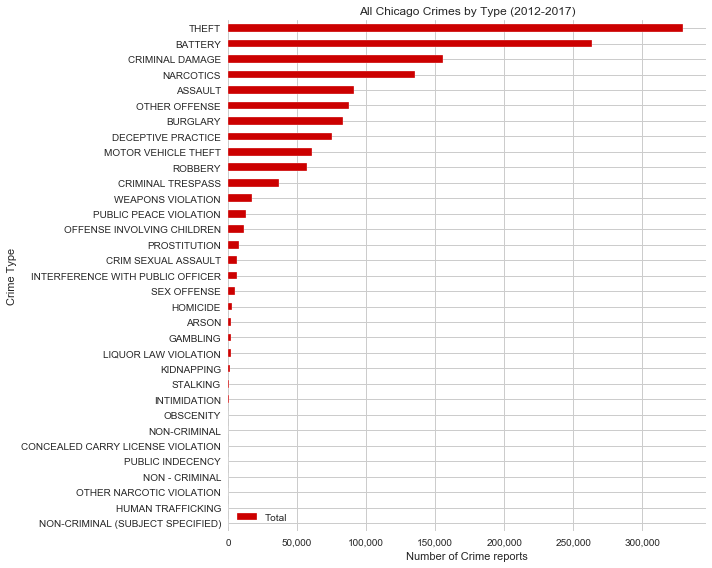

In [6]:
# plot crimes by primary type counts
all_crime_types = crime_type_counts.sort_values(by='Total', ascending=True)\
.drop(['Arrest', 'Domestic'], axis=1) # denotes column
all_crime_types.plot(kind='barh', figsize=(10,8), color='#cc0000')
plt.title('All Chicago Crimes by Type (2012-2017)')
plt.xlabel('Number of Crime reports')
plt.ylabel('Crime Type')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

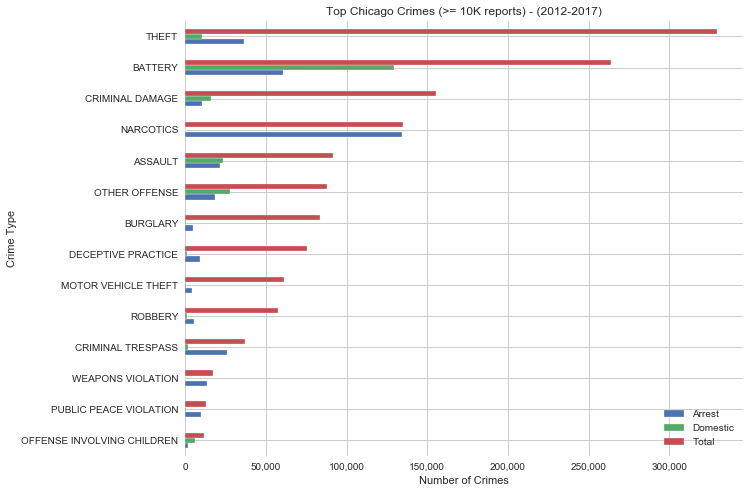

In [8]:
# plot top crimes (>-= 200,000 reports)
crime_type_counts[crime_type_counts['Total'] >= 10000].sort_values(by='Total', ascending=True)\
.plot(kind='barh', figsize=(10,8))
plt.title('Top Chicago Crimes (>= 10K reports) - (2012-2017)')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Type')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [12]:
# get narcotics crimes
narcotics = crimes[crimes['Primary Type']=='NARCOTICS']
#print(narcotics.head())

# get narcotics crime description counts
narcotics_crimes = narcotics[['Primary Type', 'Description']]\
.groupby('Description').count()\
.sort_values(by='Primary Type', ascending=False)

print(narcotics_crimes.head(10))
print('...')
print('Total Narcotics Crime Descriptions: {}'.format(len(narcotics_crimes)))

                                Primary Type
Description                                 
POSS: CANNABIS 30GMS OR LESS           60557
POSS: HEROIN(WHITE)                    21150
POSS: CRACK                            11301
MANU/DELIVER: HEROIN (WHITE)            7868
POSS: CANNABIS MORE THAN 30GMS          4315
POSS: COCAINE                           4238
FOUND SUSPECT NARCOTICS                 3849
MANU/DEL:CANNABIS 10GM OR LESS          3548
MANU/DELIVER:CRACK                      2647
SOLICIT NARCOTICS ON PUBLICWAY          2486
...
Total Narcotics Crime Descriptions: 47


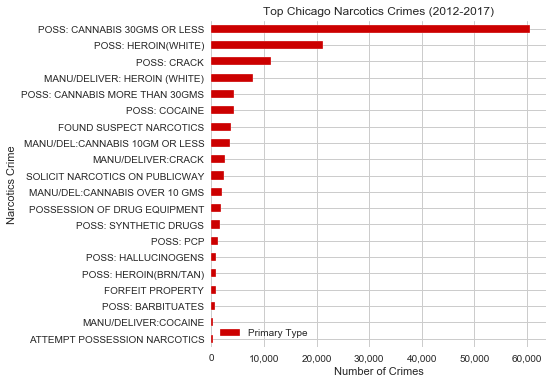

In [13]:
# plot top 20 narcotics crimes
narcotics_crimes[:20].sort_values(by='Primary Type', ascending=True)\
.plot(kind='barh', figsize=(6,6), color='#cc0000')
plt.title('Top Chicago Narcotics Crimes (2012-2017)')
plt.xlabel('Number of Crimes')
plt.ylabel('Narcotics Crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [16]:
# get other offenses crimes
other_offenses = crimes[crimes['Primary Type']=='OTHER OFFENSE']
#print(other_offenses.head())

# get other offense crime description counts
other_offense_crimes = other_offenses[['Primary Type', 'Description']]\
.groupby('Description').count()\
.sort_values(by='Primary Type', ascending=False)

print(other_offense_crimes.head(10))
print('...')
print('Total Other Offense Crime Descriptions: {}'.format(len(other_offense_crimes)))

                                Primary Type
Description                                 
TELEPHONE THREAT                       23514
HARASSMENT BY TELEPHONE                16484
HARASSMENT BY ELECTRONIC MEANS         10759
VIOLATE ORDER OF PROTECTION             7594
OTHER VEHICLE OFFENSE                   6104
PAROLE VIOLATION                        4543
FALSE/STOLEN/ALTERED TRP                3216
LICENSE VIOLATION                       2880
OTHER WEAPONS VIOLATION                 2299
VEHICLE TITLE/REG OFFENSE               1960
...
Total Other Offense Crime Descriptions: 43


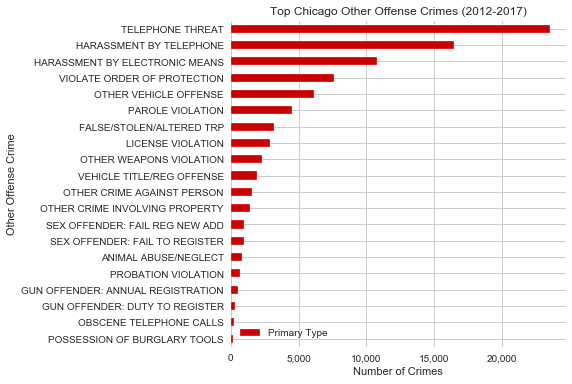

In [17]:
# plot top 20 other offense crimes
other_offense_crimes[:20].sort_values(by='Primary Type', ascending=True)\
.plot(kind='barh', figsize=(6,6), color='#cc0000')
plt.title('Top Chicago Other Offense Crimes (2012-2017)')
plt.xlabel('Number of Crimes')
plt.ylabel('Other Offense Crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

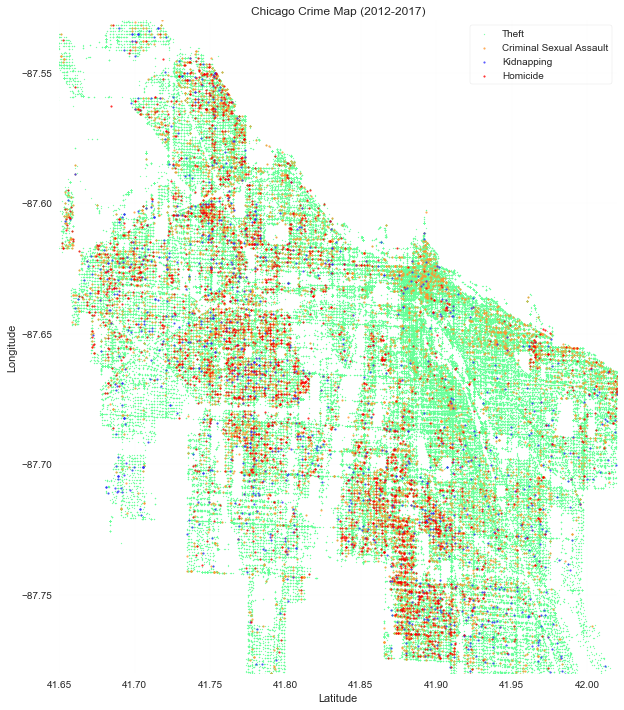

Wall time: 2.02 s


In [22]:
%%time

# get min/max lat and long
#minLat = crimes['Latitude'].min().compute()
#maxLat = crimes['Latitude'].max().compute()
#minLong = crimes['Longitude'].min().compute()
#maxLong = crimes['Longitude'].max().compute()

# get crime geo data
crime_geo = crimes[['Primary Type', 'Latitude', 'Longitude']].dropna()

# get homicides
homicides = crime_geo[(crime_geo['Primary Type']=='HOMICIDE')]\

# get kidnappings
kidnappings = crime_geo[(crime_geo['Primary Type']=='KIDNAPPING')]\

# get criminal sexual assaults
sexual_assaults = crime_geo[(crime_geo['Primary Type']=='CRIM SEXUAL ASSAULT')]\

# get thefts
thefts = crime_geo[(crime_geo['Primary Type']=='THEFT')]\

# create scatter map plot
fig,ax= plt.subplots(1, 1, figsize=(10,12))
plt.xlim(41.65, 42.02) # (minLat, maxLat)
plt.ylim(-87.78, -87.53) # (minLong, maxLong)
#ax.set_facecolor('black')

# plot thefts, homicides, kidnappings and sexual assaults
ax.scatter(thefts['Latitude'], thefts['Longitude'],\
                            s=1, alpha=0.8, color='#66ff99', label='Theft')
ax.scatter(sexual_assaults['Latitude'], sexual_assaults['Longitude'],\
                            s=3, alpha=0.8, color='#ff9933', label='Criminal Sexual Assault')
ax.scatter(kidnappings['Latitude'], kidnappings['Longitude'],\
                            s=3, alpha=0.8, color='#3333ff', label='Kidnapping')
ax.scatter(homicides['Latitude'], homicides['Longitude'],\
                            s=3, alpha=0.8, color='#ff0000', label='Homicide')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Chicago Crime Map (2012-2017)')
plt.legend(loc='upper right', frameon=True)
plt.grid(linestyle = '--', linewidth = 0.05)
plt.show()

In [ ]:
import gmaps
import gmaps.datasets

gmaps.configure(api_key="AI...") # Fill in with your API key